In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [22]:
dataset=pd.read_csv("../data/train.csv")
dataset1=pd.read_csv("../data/train.csv")
dataset.head(20)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [27]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset['text']=encoder.fit_transform(dataset['text'].astype('str'))
dataset['title']=encoder.fit_transform(dataset['title'].astype('str'))
dataset['author']=encoder.fit_transform(dataset['author'].astype('str'))

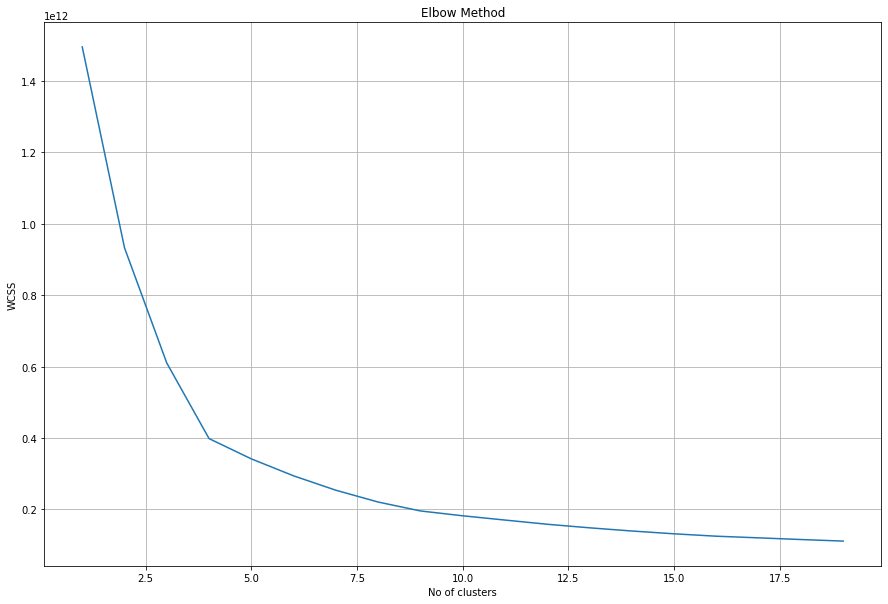

In [5]:
K = dataset
K = K.iloc[:,[0,1,2]].values
from sklearn.cluster import KMeans
wcss =[]
for j in range (1,20):
    kmeans = KMeans(n_clusters = j, init = 'k-means++', max_iter =100, n_init = 10, random_state = 0)
    kmeans.fit(K)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,10))
plt.plot(range(1,20),wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [6]:
kmeans = KMeans(n_clusters= 5, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
Kmeans = kmeans.fit_predict(K)
dataset["Kmean_Clusters"] = Kmeans

In [8]:
cluster1 = cluster2 = cluster0 = cluster3 = cluster4 = 0

for row in dataset["Kmean_Clusters"]:
    if row == 1:
        cluster1 = cluster1 + 1
    elif row == 2:
        cluster2 = cluster2 + 1
    elif row == 3:
        cluster3 = cluster3 + 1
    elif row == 4:
        cluster4 = cluster4 + 1
    else:
        cluster0 = cluster0 + 1
print(cluster3)
Cluster = [cluster3, cluster0, cluster4, cluster2, cluster1]

4523


In [9]:
dataset.head()

,id,title,author,text,label,Kmean_Clusters
0,0,7609,940,8021,1,4
1,1,5854,908,6297,0,4
2,2,18702,826,19125,1,3
3,3,145,1776,17464,1,4
4,4,8529,1498,13019,1,4


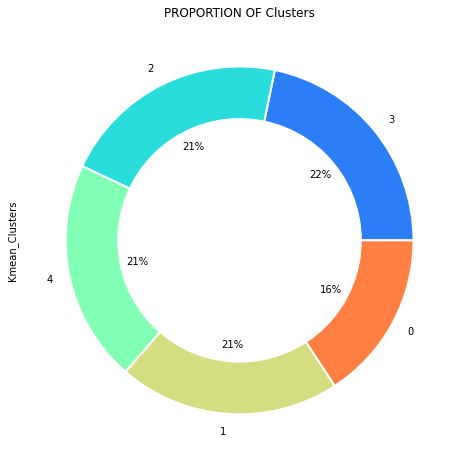

In [10]:
plt.figure(figsize=(8,8))
dataset["Kmean_Clusters"].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("rainbow",5),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.title("PROPORTION OF Clusters")
plt.show()

In [12]:
dataset.groupby(['Kmean_Clusters'])['author'].count()

Kmean_Clusters
0    3282
1    4281
2    4419
3    4523
4    4295
Name: author, dtype: int64

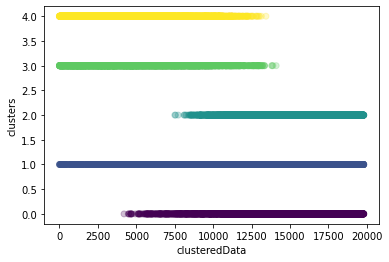

In [15]:
kmeans = KMeans(n_clusters=5)
clusteredData = kmeans.fit_predict(dataset)
#plt.plot(figsize = (100,10000))
plt.xlabel('clusteredData')
plt.ylabel('clusters')
plt.scatter(dataset.title,clusteredData, c= clusteredData, alpha=0.25) 
plt.show()

In [16]:
print((dataset.iloc[list(np.where(clusteredData==0))[0],:]))
print((dataset.iloc[list(np.where(clusteredData==1))[0],:]))
print((dataset.iloc[list(np.where(clusteredData==2))[0],:]))
print((dataset.iloc[list(np.where(clusteredData==3))[0],:]))

          id  title  author   text  label  Kmean_Clusters
2          2  18702     826  19125      1               3
10        10  11627      45  11956      0               3
12        12  13757     233  16083      1               3
14        14  13057     392  19360      1               3
16        16  18211    2572  16218      0               3
...      ...    ...     ...    ...    ...             ...
11577  11577  19264    4075  20067      1               2
11631  11631  19270    3117  20027      1               2
11635  11635  19168    3131  19478      1               2
11645  11645  18602    2399  13571      0               2
11679  11679  19509     609  20337      0               2

[3887 rows x 6 columns]
          id  title  author   text  label  Kmean_Clusters
8503    8503   3902    2748  19960      1               4
8533    8533   3722    1012  20345      1               4
8629    8629   4729    2331  19627      1               4
8649    8649   4935    4075  19813      1      

## DBScan

In [31]:
dataset.head()

,id,title,author,text,label
0,0,7609,940,8021,1
1,1,5854,908,6297,0
2,2,18702,826,19125,1
3,3,145,1776,17464,1
4,4,8529,1498,13019,1


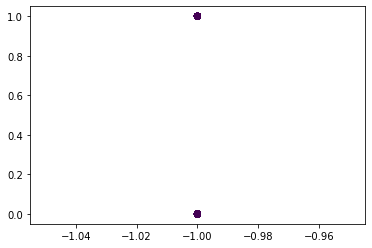

In [32]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=3, min_samples=1000)
clustering.fit(dataset)

clusteredData2 = clustering.fit_predict(dataset)
plt.scatter(clusteredData2,dataset.label, c= clusteredData2)

In [35]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(dataset)

In [36]:
row_dict = []
for index, row in dataset.iterrows():
        row_dict.append(row['author'])

In [37]:
clusternames = km.fit_predict(dataset1)
print(clusternames)
clusters = {}
n = 0
i=0
print(len(row_dict))
print(len(clusternames))
for author in clusternames:
        if author in clusters:
            if(row_dict[n] not in clusters[author]):
                clusters[author].append(row_dict[n])
                i=i+1
        else:
            clusters[author] = [row_dict[n]]
            i=i+1
        n +=1
print(clusters)

ValueError: could not convert string to float: 'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'